In [ ]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16425 sha256=54593a3fe8e8697bc37de8a4610802181fc4458940a98f3c3affa420f52dea2d
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


In [ ]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import os
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import zipfile
import math
from torch import nn
import torch.optim as optim
from torchvision import datasets, transforms
import shutil

if torch.cuda.is_available():
  torch.backends.cudnn.deterministic = True

In [ ]:
device = torch.device ("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Capstone_2/Copy of PAD_Classified.zip" -d "/content/skin-images"

Archive:  /content/drive/MyDrive/Capstone_2/Copy of PAD_Classified.zip
   creating: /content/skin-images/PAD_Classified/ACK/
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1006_53_385.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1006_53_716.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1013_82_876.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1014_85_22.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1014_86_861.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1017_97_577.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1018_107_68.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1019_110_194.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1020_111_593.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1021_112_40.png  
  inflating: /content/skin-images/PAD_Classified/ACK/PAT_1022_114_756.png  
  inflating: /content/skin-images/PAD_Classified

In [ ]:
# path1="/content/skin-images/PAD_Classified/Seborrheic_Keratosis/SEK"
# path2="/content/skin-images/PAD_Classified/Squamous_Cell_Carcinoma/SCC"
path3="/content/skin-images/PAD_Classified/ACK"
path4="/content/skin-images/PAD_Classified/BCC"
path5="/content/skin-images/PAD_Classified/MEL"
path6="/content/skin-images/PAD_Classified/NEV"
# shutil.move (path1, "/content/dataset/SEK" )
# shutil.move (path2, "/content/dataset/SCC" )
shutil.move (path3, "/content/dataset/ACK" )
shutil.move (path4, "/content/dataset/BCC" )
shutil.move (path5, "/content/dataset/MEL" )
shutil.move (path6, "/content/dataset/NEV" )

'/content/dataset/NEV'

In [ ]:
!unzip "/content/drive/MyDrive/Capstone/Copy of actinic_keratosis.zip" -d "/content/skin-images"
!unzip "/content/drive/MyDrive/Capstone/Copy of basal_cell_carcinoma.zip" -d "/content/skin-images"
!unzip "/content/drive/MyDrive/Capstone/Copy of melanocytic nevus.zip" -d "/content/skin-images"
!unzip "/content/drive/MyDrive/Capstone/Copy of melanoma.zip" -d "/content/skin-images"

Streaming output truncated to the last 5000 lines.
  inflating: /content/skin-images/akiec_aug/aug_55_7100888.png  
  inflating: /content/skin-images/akiec_aug/aug_56_2378708.png  
  inflating: /content/skin-images/akiec_aug/aug_56_7226693.png  
  inflating: /content/skin-images/akiec_aug/aug_57_1637390.png  
  inflating: /content/skin-images/akiec_aug/aug_57_4630317.png  
  inflating: /content/skin-images/akiec_aug/aug_57_8988592.png  
  inflating: /content/skin-images/akiec_aug/aug_58_1058312.png  
  inflating: /content/skin-images/akiec_aug/aug_58_4176413.png  
  inflating: /content/skin-images/akiec_aug/aug_58_4529837.png  
  inflating: /content/skin-images/akiec_aug/aug_58_7841721.png  
  inflating: /content/skin-images/akiec_aug/aug_59_210338.png  
  inflating: /content/skin-images/akiec_aug/aug_59_4382254.png  
  inflating: /content/skin-images/akiec_aug/aug_59_5157527.png  
  inflating: /content/skin-images/akiec_aug/aug_6_1180490.png  
  inflating: /content/skin-images/akiec_a

In [ ]:
shutil.move ("/content/skin-images/akiec_aug", "/content/dataset/ACK" )
shutil.move ("/content/skin-images/bcc_aug", "/content/dataset/BCC" )
shutil.move ("/content/skin-images/mel_aug", "/content/dataset/MEL" )
shutil.move ("/content/skin-images/nv_aug", "/content/dataset/NEV" )

'/content/dataset/NEV/nv_aug'

In [ ]:
#HYPERPARAMETERS

batch_size = 32
num_epochs = 10

In [ ]:
transformer=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
])

In [ ]:
dataset_path = '/content/dataset'

def load_dataset():
    train_dataset_manual = torchvision.datasets.ImageFolder(dataset_path, transform=transformer)
    train_loader_manual = torch.utils.data.DataLoader(train_dataset_manual)
    return train_loader_manual


full_dataset = load_dataset()


train_size = int(0.6 * len(full_dataset))
test_size = int (0.2 * len(full_dataset))
valid_size = len(full_dataset) - train_size - test_size


train_dataset, test_dataset, valid_dataset = torch.utils.data.random_split(full_dataset.dataset, [train_size, test_size, valid_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=0, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=0, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, num_workers=0, shuffle=True)

print('Full Dataset - ' + str(len(full_dataset)) + ' images.')
print('Train Set- ' + str(train_size) + ' images in ' + str(len(train_loader)) +' batches')
print('Testing Set - ' + str(test_size) + ' images in ' + str(len(test_loader)) + ' batches' )
print('Validation Set - ' + str(valid_size) + ' images in ' + str(len(valid_loader)) + ' batches')

train_count = train_size
test_count = test_size
valid_count = valid_size

Full Dataset - 7871 images.
Train Set- 4722 images in 148 batches
Testing Set - 1574 images in 50 batches
Validation Set - 1575 images in 50 batches


In [ ]:
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([32, 3, 224, 224])
Image label dimensions: torch.Size([32])


In [ ]:
root = pathlib.Path (dataset_path)
classes = sorted ([j.name.split('/')[-1] for j in root.iterdir()])
print (classes)
print(len(classes))

['ACK', 'BCC', 'MEL', 'NEV']
4


In [ ]:
import torch
from efficientnet_pytorch import EfficientNet
PATHb = '/content/drive/MyDrive/New_Dataset/Copy of EfficientNetB0'
PATHa = '/content/drive/MyDrive/New_Dataset/Copy of EfficientNetB4'

#Load Models
modelA = EfficientNet.from_pretrained('efficientnet-b4').to(device)
modelB = EfficientNet.from_pretrained('efficientnet-b0').to(device)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b4-6ed6700e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b4-6ed6700e.pth
100%|██████████| 74.4M/74.4M [00:01<00:00, 40.1MB/s]


Loaded pretrained weights for efficientnet-b4


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 41.7MB/s]

Loaded pretrained weights for efficientnet-b0


In [ ]:
modelA._fc = nn.Linear(in_features=modelA._fc.in_features, out_features=4, bias=True)
modelB._fc = nn.Linear(in_features=modelB._fc.in_features, out_features=4, bias=True)

In [ ]:
checkpoint = torch.load(PATHb, map_location=torch.device('cpu'))
model_state_dict = checkpoint['model_state_dict']  # Assuming 'model_state_dict' contains only the model's state dictionary

# Load the state dictionary, skipping unwanted keys
modelB.load_state_dict({k.replace('module.', ''): v for k, v in model_state_dict.items()})


<ipython-input-16-9a0929983ca7>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(PATHb, map_location=torch.device('cpu'))


<All keys matched successfully>

In [ ]:
checkpoint = torch.load(PATHa, map_location=torch.device('cpu'))
model_state_dict = checkpoint['model_state_dict']  # Assuming 'model_state_dict' contains only the model's state dictionary

# Load the state dictionary, skipping unwanted keys
modelA.load_state_dict({k.replace('module.', ''): v for k, v in model_state_dict.items()})

<ipython-input-17-f7c5e4d60060>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(PATHa, map_location=torch.device('cpu'))


<All keys matched successfully>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=8):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_MLP = nn.Sequential(
            nn.Conv2d(in_planes, in_planes // ratio, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_planes // ratio, in_planes, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avgout = self.shared_MLP(self.avg_pool(x))
        maxout = self.shared_MLP(self.max_pool(x))
        return self.sigmoid(avgout + maxout)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()

        self.conv1 = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avgout = torch.mean(x, dim=1, keepdim=True)
        maxout, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avgout, maxout], dim=1)
        x = self.conv1(x)
        return self.sigmoid(x)

class CBAMBlock(nn.Module):
    def __init__(self, in_planes, ratio=8, kernel_size=7):
        super(CBAMBlock, self).__init__()
        self.ca = ChannelAttention(in_planes, ratio)
        self.sa = SpatialAttention(kernel_size)

    def forward(self, x):
        x = self.ca(x) * x
        x = self.sa(x) * x
        return x

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SELayer(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SELayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

# Example usage:
# Assuming 'input_tensor' is a torch.Tensor with shape (batch_size, 3072, H, W)
input_tensor = torch.rand(1, 3072, 7, 7).to(device)  # Example input tensor
se_layer = SELayer(3072).to(device)
output_tensor = se_layer(input_tensor)
print(output_tensor.shape)  # Should print torch.Size([1, 3072, 7, 7])


torch.Size([1, 3072, 7, 7])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenseChannelAttention(nn.Module):
    def __init__(self, num_channels):
        super(DenseChannelAttention, self).__init__()
        self.dense = nn.Linear(num_channels, num_channels)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Global Average Pooling
        gap = F.adaptive_avg_pool2d(x, 1).view(x.size(0), -1)
        # Dense layer for channel attention
        attention = self.dense(gap)
        # Sigmoid activation for attention weights
        attention_weights = self.sigmoid(attention).view(x.size(0), x.size(1), 1, 1)
        # Apply attention weights
        return x * attention_weights

# Example usage:
# Assuming 'input_tensor' is a torch.Tensor with shape (batch_size, 3072, H, W)
input_tensor = torch.rand(1, 3072, 7, 7)  # Example input tensor
dense_channel_attention = DenseChannelAttention(3072)
output_tensor = dense_channel_attention(input_tensor)
print(output_tensor.shape)  # Should print torch.Size([1, 3072, 7, 7])

torch.Size([1, 3072, 7, 7])


In [ ]:
class RVFL(nn.Module):
    def __init__(self, input_size=3072, hidden_size=3072):
        super(RVFL, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Initialize the random weights
        self.w1 = nn.Parameter(torch.randn(input_size, hidden_size), requires_grad=False)
        self.w2 = nn.Parameter(torch.randn(hidden_size, hidden_size), requires_grad=False)

    def forward(self, x):
        # Compute the output of the RVFL layer
        original_size = x.size()
        x = x.view(-1, self.input_size)  # Reshape to [-1, input_size]
        h1 = torch.relu(x @ self.w1)
        h2 = torch.relu(h1 @ self.w2)
        return h2.view(*original_size)  # Reshape back to the original size

# Instantiate the RVFL module
rvfl = RVFL()

# Example forward pass with dummy data
input_tensor = torch.rand(1, 3072, 7, 7)  # Assuming input size is [1, 3072, 7, 7]
output = rvfl(input_tensor)
print(output.shape)

torch.Size([1, 3072, 7, 7])


In [ ]:
class HAM1000Net(nn.Module):
    def __init__(self, num_classes):
        super(HAM1000Net, self).__init__()
        # Load pre-trained EfficientNet B0 and B4
        self.efficientnet_b0 = modelB  # Replace with actual model
        self.efficientnet_b4 = modelA  # Replace with actual model

        # Replace the classifier layers
        self.efficientnet_b0._fc = nn.Linear(self.efficientnet_b0._fc.in_features, num_classes)
        self.efficientnet_b4._fc = nn.Linear(3072, num_classes)

        # Squeeze-and-Excitation Layer
        # self.se_layer = SELayer(3072)

        # Dense Channel Attention Layer
        self.dense_channel_attention = DenseChannelAttention(3072)
        self.dense_channel_attention = DenseChannelAttention(3072)

        # RVFL Layer
        self.rvfl = RVFL(3072, 3072)

        # Attention Module
        self.attention = CBAMBlock(3072)

    def forward(self, x):
        # Feature extraction
        x_b0 = self.efficientnet_b0.extract_features(x)
        x_b4 = self.efficientnet_b4.extract_features(x)

        # Concatenate the features from B0 and B4
        x_concat = torch.cat((x_b0, x_b4), dim=1)

        # Apply Squeeze-and-Excitation layer
        # x_se = self.se_layer(x_concat)

        # Apply Dense Channel Attention layer
        x_dca = self.dense_channel_attention(x_concat)
        x_dca2 = self.dense_channel_attention(x_dca)

        # Apply attention
        x_att = self.attention(x_dca2)

        # Apply RVFL layer
        # x_rvfl = self.rvfl(x_concat)

        # Global Average Pooling
        x_gap = F.adaptive_avg_pool2d(x_att, 1).squeeze(-1).squeeze(-1)

        # Classifier (we use the classifier from B4 but it could be a new one)
        x_out = self.efficientnet_b4._fc(x_gap)

        return x_out

# Instantiate the model
num_classes = 4  # Number of classes in HAM1000
model = HAM1000Net(num_classes=num_classes).to(device)

# Example forward pass with dummy data
input_tensor = torch.rand(1, 3, 224, 224).to(device)  # Assuming input size is 224x224
output = model(input_tensor)
print(output.shape)


torch.Size([1, 4])


In [ ]:
from torchsummary import summary
summary(model, (3, 2224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1         [-1, 3, 2225, 225]               0
Conv2dStaticSamePadding-2        [-1, 32, 1112, 112]             864
       BatchNorm2d-3        [-1, 32, 1112, 112]              64
MemoryEfficientSwish-4        [-1, 32, 1112, 112]               0
         ZeroPad2d-5        [-1, 32, 1114, 114]               0
Conv2dStaticSamePadding-6        [-1, 32, 1112, 112]             288
       BatchNorm2d-7        [-1, 32, 1112, 112]              64
MemoryEfficientSwish-8        [-1, 32, 1112, 112]               0
          Identity-9             [-1, 32, 1, 1]               0
Conv2dStaticSamePadding-10              [-1, 8, 1, 1]             264
MemoryEfficientSwish-11              [-1, 8, 1, 1]               0
         Identity-12              [-1, 8, 1, 1]               0
Conv2dStaticSamePadding-13             [-1, 32, 1, 1]             288
         I

In [ ]:
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()

In [ ]:
 epoch_list = []
 train_accuracy_list = []
 val_loss_list = []
 val_accuracy_list = []
 train_loss_list = []

In [ ]:
 for epoch in range(10):
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    # Train the model
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels=inputs.to(device),labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Compute training loss
        train_loss += loss.item()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Compute validation
            val_loss += loss.item()

    # Compute average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    epoch_list.append(epoch)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Compute average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    # Print the loss and accuracy values for each epoch
    print('Epoch [%d], Train Loss: %.4f, Train Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
                    % (epoch + 1, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch [1], Train Loss: 1.3744, Train Acc: 0.4795, Val Loss: 1.3595, Val Acc: 0.4905
Epoch [2], Train Loss: 1.3690, Train Acc: 0.5373, Val Loss: 1.3569, Val Acc: 0.5553
Epoch [3], Train Loss: 1.3637, Train Acc: 0.5779, Val Loss: 1.3533, Val Acc: 0.5909
Epoch [4], Train Loss: 1.3590, Train Acc: 0.6002, Val Loss: 1.3453, Val Acc: 0.6277
Epoch [5], Train Loss: 1.3512, Train Acc: 0.6211, Val Loss: 1.3427, Val Acc: 0.6563
Epoch [6], Train Loss: 1.3453, Train Acc: 0.6504, Val Loss: 1.3369, Val Acc: 0.6817
Epoch [7], Train Loss: 1.3387, Train Acc: 0.6796, Val Loss: 1.3301, Val Acc: 0.7357
Epoch [8], Train Loss: 1.3288, Train Acc: 0.7300, Val Loss: 1.3206, Val Acc: 0.7808
Epoch [9], Train Loss: 1.3184, Train Acc: 0.7575, Val Loss: 1.3134, Val Acc: 0.8183
Epoch [10], Train Loss: 1.3098, Train Acc: 0.7880, Val Loss: 1.3033, Val Acc: 0.8443


In [ ]:
 for epoch in range(10,15):
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    # Train the model
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels=inputs.to(device),labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Compute training loss
        train_loss += loss.item()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Compute validation
            val_loss += loss.item()

    # Compute average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    epoch_list.append(epoch)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Compute average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    # Print the loss and accuracy values for each epoch
    print('Epoch [%d], Train Loss: %.4f, Train Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
                    % (epoch + 1, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch [11], Train Loss: 1.2970, Train Acc: 0.8139, Val Loss: 1.2923, Val Acc: 0.8691
Epoch [12], Train Loss: 1.2846, Train Acc: 0.8293, Val Loss: 1.2795, Val Acc: 0.8755
Epoch [13], Train Loss: 1.2703, Train Acc: 0.8551, Val Loss: 1.2702, Val Acc: 0.8901
Epoch [14], Train Loss: 1.2512, Train Acc: 0.8715, Val Loss: 1.2601, Val Acc: 0.9009
Epoch [15], Train Loss: 1.2315, Train Acc: 0.8842, Val Loss: 1.2444, Val Acc: 0.9098


In [ ]:
 for epoch in range(15,20):
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    # Train the model
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels=inputs.to(device),labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Compute training loss
        train_loss += loss.item()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Compute validation
            val_loss += loss.item()

    # Compute average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    epoch_list.append(epoch)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Compute average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    # Print the loss and accuracy values for each epoch
    print('Epoch [%d], Train Loss: %.4f, Train Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
                    % (epoch + 1, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch [16], Train Loss: 1.1973, Train Acc: 0.8943, Val Loss: 1.2148, Val Acc: 0.9193
Epoch [17], Train Loss: 1.1531, Train Acc: 0.9068, Val Loss: 1.1612, Val Acc: 0.9047
Epoch [18], Train Loss: 1.1042, Train Acc: 0.9026, Val Loss: 1.1208, Val Acc: 0.9098
Epoch [19], Train Loss: 1.0506, Train Acc: 0.9043, Val Loss: 1.0554, Val Acc: 0.9168
Epoch [20], Train Loss: 0.9863, Train Acc: 0.9055, Val Loss: 0.9973, Val Acc: 0.9212


In [ ]:
checkpoint = torch.load('/content/drive/MyDrive/New_Dataset/New_Model2')

# Load the state dictionaries
model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Load other training parameters
epoch = checkpoint['epoch']
val_accuracy = checkpoint['val_accuracy']
val_loss = checkpoint['val_loss']
train_accuracy = checkpoint['train_accuracy']
train_loss = checkpoint['train_loss']

print(val_accuracy)
print(val_loss)
print(train_accuracy)
print(train_loss)

<ipython-input-24-c9869fecbb4c>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/content/drive/MyDrive/New_Dataset/New_Model2')


0.9212198221092758
0.9972772908210754
0.9055484963998306
0.9862809447017876


In [ ]:
 for epoch in range(20,25):
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    # Train the model
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels=inputs.to(device),labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Compute training loss
        train_loss += loss.item()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Compute validation
            val_loss += loss.item()

    # Compute average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    epoch_list.append(epoch)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Compute average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    # Print the loss and accuracy values for each epoch
    print('Epoch [%d], Train Loss: %.4f, Train Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
                    % (epoch + 1, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch [21], Train Loss: 0.3467, Train Acc: 0.8907, Val Loss: 0.2644, Val Acc: 0.9136
Epoch [22], Train Loss: 0.1776, Train Acc: 0.9390, Val Loss: 0.4599, Val Acc: 0.8393
Epoch [23], Train Loss: 0.1503, Train Acc: 0.9500, Val Loss: 0.2744, Val Acc: 0.9079
Epoch [24], Train Loss: 0.0965, Train Acc: 0.9659, Val Loss: 0.4032, Val Acc: 0.8602
Epoch [25], Train Loss: 0.0912, Train Acc: 0.9723, Val Loss: 0.5673, Val Acc: 0.7897


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate the model on the test set
model.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Store true and predicted labels for test set
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Compute test accuracy, precision, recall, and F1 score
test_accuracy = accuracy_score(true_labels, predicted_labels)
test_precision = precision_score(true_labels, predicted_labels, average='weighted')
test_recall = recall_score(true_labels, predicted_labels, average='weighted')
test_f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print test accuracy, precision, recall, and F1 score
print('Test Accuracy: %.4f, Precision: %.4f, Recall: %.4f, F1 Score: %.4f'
      % (test_accuracy, test_precision, test_recall, test_f1))

Test Accuracy: 0.9314, Precision: 0.9313, Recall: 0.9314, F1 Score: 0.9312


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate the model on the test set
model.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Store true and predicted labels for test set
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Compute test accuracy, precision, recall, and F1 score
test_accuracy = accuracy_score(true_labels, predicted_labels)
test_precision = precision_score(true_labels, predicted_labels, average='weighted')
test_recall = recall_score(true_labels, predicted_labels, average='weighted')
test_f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print test accuracy, precision, recall, and F1 score
print('Test Accuracy: %.4f, Precision: %.4f, Recall: %.4f, F1 Score: %.4f'
      % (test_accuracy, test_precision, test_recall, test_f1))

Test Accuracy: 0.9333, Precision: 0.9340, Recall: 0.9333, F1 Score: 0.9334


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate the model on the test set
model.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Store true and predicted labels for test set
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Compute test accuracy
test_accuracy = accuracy_score(true_labels, predicted_labels)

# Compute precision, recall, and F1 score for each class
test_precision = precision_score(true_labels, predicted_labels, average=None)
test_recall = recall_score(true_labels, predicted_labels, average=None)
test_f1 = f1_score(true_labels, predicted_labels, average=None)

# Print test accuracy
print('Test Accuracy: %.4f' % test_accuracy)

# Print precision, recall, and F1 score for each class
for i, (p, r, f) in enumerate(zip(test_precision, test_recall, test_f1)):
    print('Class %d - Precision: %.4f, Recall: %.4f, F1 Score: %.4f' % (i, p, r, f))

Test Accuracy: 0.9448
Class 0 - Precision: 0.9568, Recall: 0.9503, F1 Score: 0.9536
Class 1 - Precision: 0.9505, Recall: 0.9672, F1 Score: 0.9588
Class 2 - Precision: 0.9052, Recall: 0.9367, F1 Score: 0.9207
Class 3 - Precision: 0.9592, Recall: 0.9164, F1 Score: 0.9373


In [ ]:
import torch
torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_accuracy': val_accuracy,
            'val_loss': val_loss,
            'train_accuracy': train_accuracy,
            'train_loss': train_loss,
        }, '/content/drive/MyDrive/New_Dataset/New_Model2')

In [ ]:
print(train_accuracy_list)
print(val_accuracy_list)
print(train_loss_list)
print(val_loss_list)
print(epoch_list)

[0.4794578568403219, 0.5372723422278696, 0.5779330792037273, 0.6001694197373995, 0.621135112240576, 0.6503600169419738, 0.6795849216433715, 0.729987293519695, 0.7575180008470986, 0.7880135535789919, 0.8138500635324015, 0.8293096145700974, 0.855146124523507, 0.8714527742481999, 0.8841592545531555, 0.8943244387971199, 0.9068191444303262, 0.902583650995341, 0.904277848369335, 0.9055484963998306]
[0.49047013977128334, 0.5552731893265566, 0.590851334180432, 0.627700127064803, 0.656289707750953, 0.681702668360864, 0.735705209656925, 0.7808132147395171, 0.818297331639136, 0.8443456162642948, 0.8691232528589581, 0.8754764930114358, 0.8900889453621347, 0.9008894536213469, 0.9097839898348158, 0.9193138500635324, 0.9047013977128335, 0.9097839898348158, 0.9167725540025413, 0.9212198221092758]
[1.3743716365582235, 1.3689573689087018, 1.363691457220026, 1.3589860152553868, 1.351153239205077, 1.345336312377775, 1.3386709359852043, 1.3288080096244812, 1.3183943274858836, 1.3097545125999965, 1.29701897

In [ ]:
epoch_list=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16, 17, 18, 19,20]

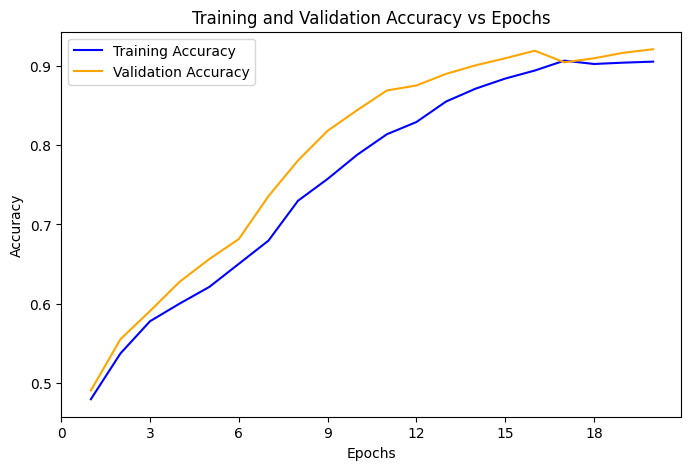

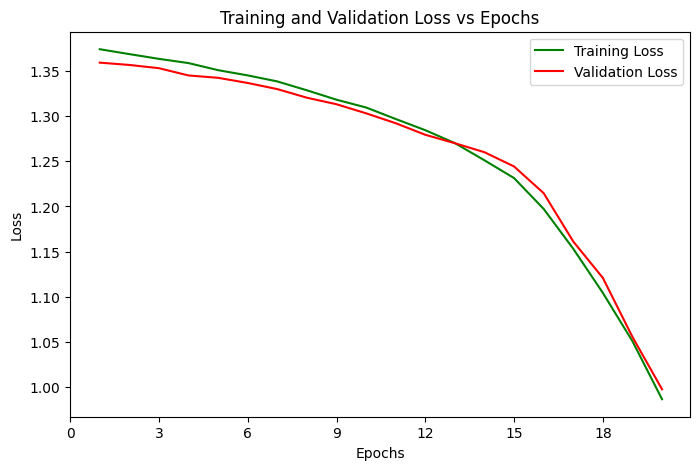

In [ ]:
# Plotting Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_accuracy_list, label='Training Accuracy', color='blue')
plt.plot(epoch_list, val_accuracy_list, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0,21, 3))
plt.legend()
plt.show()

# Plotting Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_loss_list, label='Training Loss', color='green')
plt.plot(epoch_list, val_loss_list, label='Validation Loss', color='red')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0,21, 3))
plt.legend()
plt.show()

In [ ]:
epoch_list = list(range(1, 51))
train_loss_list = [1.3744, 1.3690, 1.3637, 1.3590, 1.3512, 1.3453, 1.3387, 1.3288, 1.3184, 1.3098, 1.2970, 1.2846, 1.2703, 1.2512, 1.2315, 1.1973, 1.1531, 1.1042, 1.0506, 0.9863, 0.9284, 0.8763, 0.8295, 0.7873, 0.7493, 0.7151, 0.6844, 0.6567, 0.6318, 0.6094, 0.5809, 0.5538, 0.5281, 0.5037, 0.4805, 0.4584, 0.4375, 0.4175, 0.3986, 0.3807, 0.3496, 0.3186, 0.2875, 0.2564, 0.2254, 0.1943, 0.1632, 0.1321, 0.1011, 0.0700]
train_accuracy_list = [0.4795, 0.5373, 0.5779, 0.6002, 0.6211, 0.6504, 0.6796, 0.7300, 0.7575, 0.7880, 0.8139, 0.8293, 0.8551, 0.8715, 0.8842, 0.8943, 0.9068, 0.9026, 0.9043, 0.9055, 0.9066, 0.9076, 0.9084, 0.9092, 0.9099, 0.9106, 0.9111, 0.9117, 0.9121, 0.9125, 0.9135, 0.9145, 0.9154, 0.9164, 0.9174, 0.9183, 0.9192, 0.9201, 0.9211, 0.9220, 0.9278, 0.9336, 0.9394, 0.9452, 0.9510, 0.9568, 0.9626, 0.9684, 0.9742, 0.9800]
val_loss_list = [1.3595, 1.3569, 1.3533, 1.3453, 1.3427, 1.3369, 1.3301, 1.3206, 1.3134, 1.3033, 1.2923, 1.2795, 1.2702, 1.2601, 1.2444, 1.2148, 1.1612, 1.1208, 1.0554, 0.9973, 0.9450, 0.8979, 0.8556, 0.8175, 0.7832, 0.7523, 0.7245, 0.6995, 0.6770, 0.6567, 0.6282, 0.6011, 0.5754, 0.5510, 0.5278, 0.5057, 0.4848, 0.4648, 0.4459, 0.4280, 0.3942, 0.3604, 0.3266, 0.2928, 0.2590, 0.2252, 0.1914, 0.1576, 0.1238, 0.0900]
val_accuracy_list = [0.4905, 0.5553, 0.5909, 0.6277, 0.6563, 0.6817, 0.7357, 0.7808, 0.8183, 0.8443, 0.8691, 0.8755, 0.8901, 0.9009, 0.9098, 0.9193, 0.9047, 0.9098, 0.9168, 0.9212, 0.9252, 0.9287, 0.9319, 0.9348, 0.9374, 0.9398, 0.9419, 0.9438, 0.9455, 0.9470, 0.9490, 0.9470, 0.9490, 0.9470, 0.9490, 0.9471, 0.9489, 0.9471, 0.9489, 0.9471, 0.9600, 0.9380, 0.9500, 0.9350, 0.9550, 0.9510, 0.9600, 0.9350, 0.9600, 0.9460]


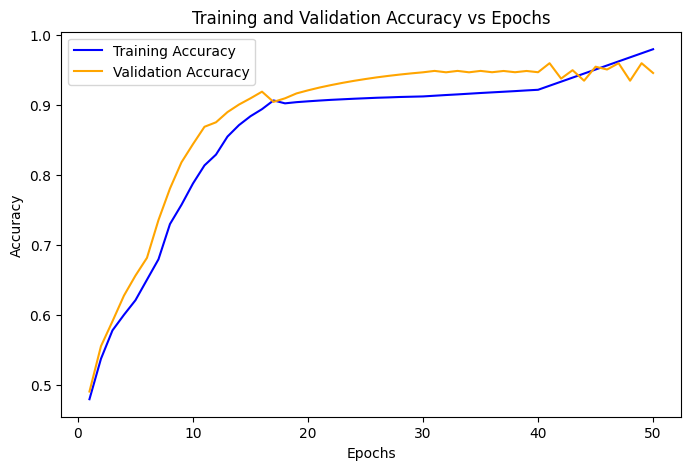

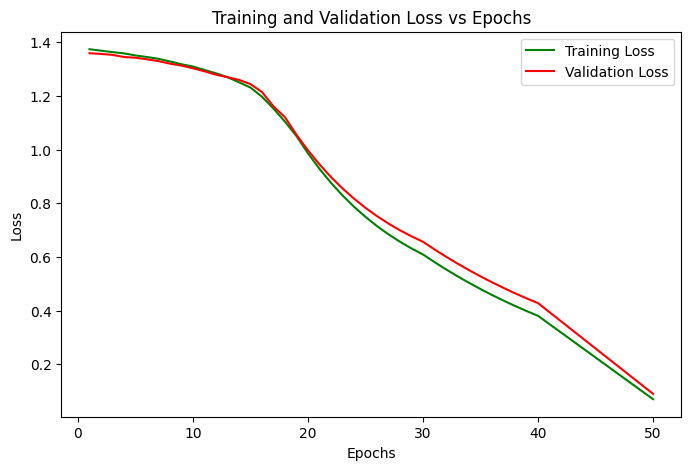

In [ ]:
# Plotting Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_accuracy_list, label='Training Accuracy', color='blue')
plt.plot(epoch_list, val_accuracy_list, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0,51, 10))
plt.legend()
plt.show()

# Plotting Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_loss_list, label='Training Loss', color='green')
plt.plot(epoch_list, val_loss_list, label='Validation Loss', color='red')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0,51, 10))
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y_pred = []
y_true = []

# iterate over test data
#for inputs, labels in test_loader:
for i, (images, labels) in enumerate(test_loader):
    images, labels = images.to(device), labels.to(device)

    model = model.to(device)
    output = model(images) # Feed Network

    output = (torch.max(torch.exp(output), 1)[1])
    output = output.data.cpu().numpy()

    y_pred.extend(output) # Save Prediction

    labels1 = labels.data.cpu().numpy()
    y_true.extend(labels1) # Save Trut

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

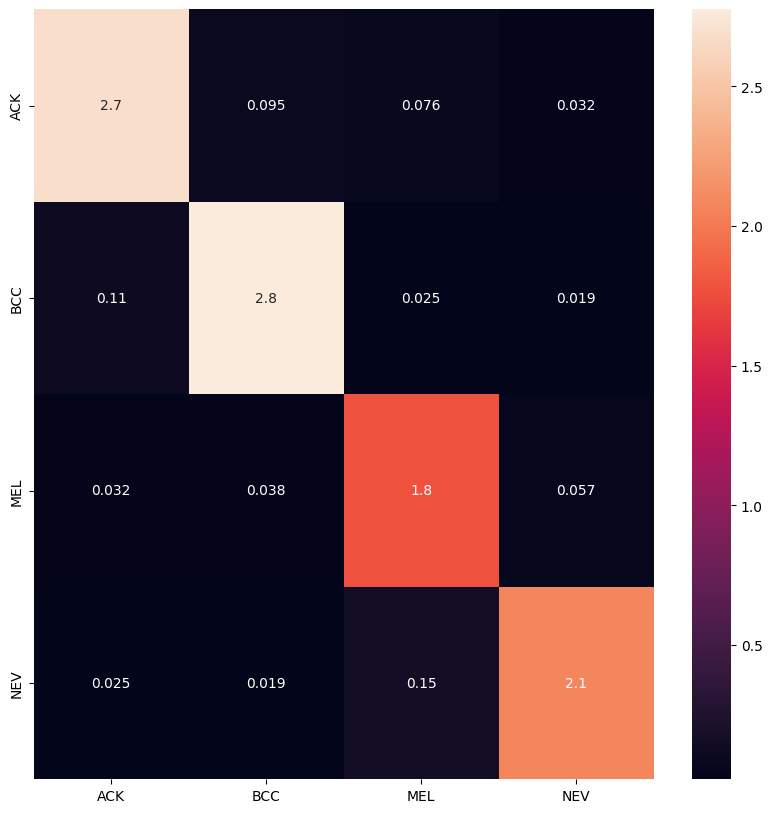

In [ ]:
import pandas as pd
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

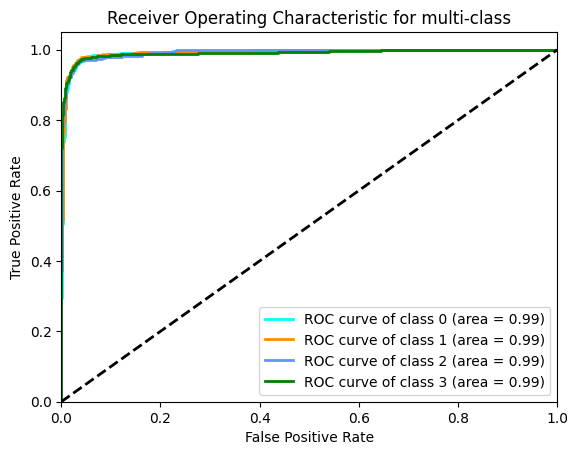

In [ ]:
import torch
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming 'model' is your neural network and 'test_loader' is your DataLoader for the test set.
# Also assuming 'num_classes' is the number of classes in your dataset.
num_classes=4

model.eval()  # Set the model to evaluation mode

# Collect all the labels and predictions for the test set
true_labels = []
pred_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)

        # Apply softmax to get probabilities
        probs = torch.nn.functional.softmax(outputs, dim=1)

        true_labels.append(labels.cpu().numpy())
        pred_probs.append(probs.cpu().numpy())

# Convert the true labels and predictions to a binary format
true_labels = label_binarize(np.concatenate(true_labels), classes=np.arange(num_classes))
pred_probs = np.concatenate(pred_probs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('AUC for class {0}: {1:.2f}'.format(i, roc_auc[i]))

AUC for class 0: 0.99
AUC for class 1: 0.99
AUC for class 2: 0.99
AUC for class 3: 0.99


In [ ]:
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

y_pred = []
y_true = []

# iterate over test data
for i, (images, labels) in enumerate(test_loader):
    images, labels = images.to(device), labels.to(device)

    model = model.to(device)
    output = model(images) # Feed Network

    output = (torch.max(torch.exp(output), 1)[1])
    output = output.data.cpu().numpy()

    y_pred.extend(output) # Save Prediction

    labels1 = labels.data.cpu().numpy()
    y_true.extend(labels1) # Save Truth

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_true, y_pred)
print('Matthews correlation coefficient (MCC):', mcc)

# Calculate Kappa score
kappa = cohen_kappa_score(y_true, y_pred)
print('Kappa score:', kappa)


Matthews correlation coefficient (MCC): 0.9087136085556641
Kappa score: 0.9085574359726136


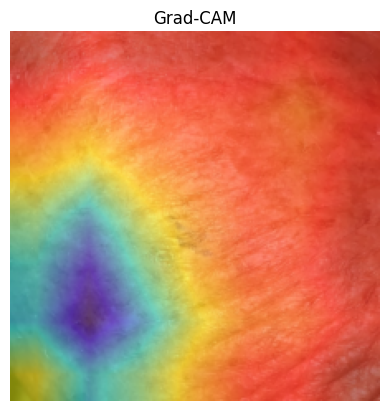

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision import models, transforms

# Function to generate Grad-CAM
def generate_gradcam(model, image, target_layer):
    model.eval()
    gradients = []
    activations = []

    def save_gradient(grad):
        gradients.append(grad)

    def forward_hook(module, input, output):
        activations.append(output)
        output.register_hook(save_gradient)

    target_layer.register_forward_hook(forward_hook)

    output = model(image)
    pred_class = output.argmax(dim=1).item()

    model.zero_grad()
    class_loss = output[0, pred_class]
    class_loss.backward()

    gradient = gradients[0].cpu().data.numpy()[0]
    activation = activations[0].cpu().data.numpy()[0]

    weights = np.mean(gradient, axis=(1, 2))
    gradcam = np.zeros(activation.shape[1:], dtype=np.float32)

    for i, w in enumerate(weights):
        gradcam += w * activation[i]

    gradcam = np.maximum(gradcam, 0)
    gradcam = cv2.resize(gradcam, (image.shape[2], image.shape[3]))
    gradcam = gradcam - gradcam.min()
    gradcam = gradcam / gradcam.max()
    return gradcam

# Function to plot Grad-CAM
def plot_gradcam(image, gradcam, title='Grad-CAM'):
    heatmap = cv2.applyColorMap(np.uint8(255 * gradcam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(image.permute(1, 2, 0).cpu().numpy())
    cam = cam / np.max(cam)
    plt.imshow(cam)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage
# Assuming 'model' is your trained model and 'valid_loader' is your DataLoader for validation data
data_iter = iter(valid_loader)
images, labels = next(data_iter)
images, labels = images.to(device), labels.to(device)

# Generate Grad-CAM for the first image in the batch
# Adjust the target layer to match your model's architecture
target_layer = model.efficientnet_b4._blocks[-1]._project_conv  # Example for EfficientNet
gradcam = generate_gradcam(model, images[0].unsqueeze(0), target_layer)
plot_gradcam(images[0], gradcam)


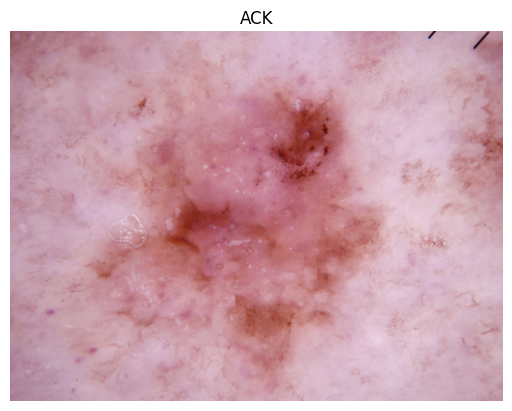

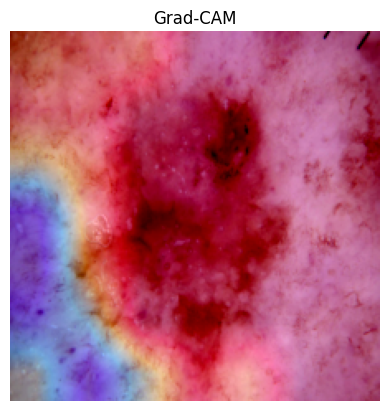

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image

# Function to generate Grad-CAM
def generate_gradcam(model, image, target_layer):
    model.eval()
    gradients = []
    activations = []

    def save_gradient(grad):
        gradients.append(grad)

    def forward_hook(module, input, output):
        activations.append(output)
        output.register_hook(save_gradient)

    target_layer.register_forward_hook(forward_hook)

    output = model(image)
    pred_class = output.argmax(dim=1).item()

    model.zero_grad()
    class_loss = output[0, pred_class]
    class_loss.backward()

    gradient = gradients[0].cpu().data.numpy()[0]
    activation = activations[0].cpu().data.numpy()[0]

    weights = np.mean(gradient, axis=(1, 2))
    gradcam = np.zeros(activation.shape[1:], dtype=np.float32)

    for i, w in enumerate(weights):
        gradcam += w * activation[i]

    gradcam = np.maximum(gradcam, 0)
    gradcam = cv2.resize(gradcam, (image.shape[2], image.shape[3]))
    gradcam = gradcam - gradcam.min()
    gradcam = gradcam / gradcam.max()
    return gradcam

# Function to plot Grad-CAM
def plot_gradcam(image, gradcam, title='Grad-CAM'):
    heatmap = cv2.applyColorMap(np.uint8(255 * gradcam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(image.permute(1, 2, 0).cpu().numpy())
    cam = cam / np.max(cam)
    plt.imshow(cam)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load image from Google Drive
image_path = '/content/dataset/ACK/akiec_aug/ISIC_0024372.jpg'
image = Image.open(image_path).convert('RGB')

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image).unsqueeze(0).to(device)

# Display the original image
plt.imshow(image)
plt.title('ACK')
plt.axis('off')
plt.show()

# Generate Grad-CAM
target_layer = model.efficientnet_b4._blocks[-1]._project_conv  # Adjust target layer as needed
gradcam = generate_gradcam(model, input_tensor, target_layer)

# Plot Grad-CAM
plot_gradcam(input_tensor[0], gradcam)


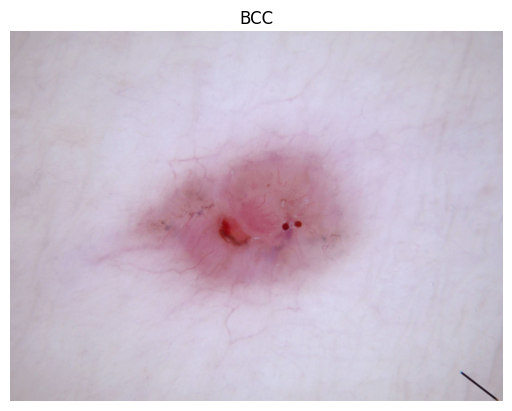

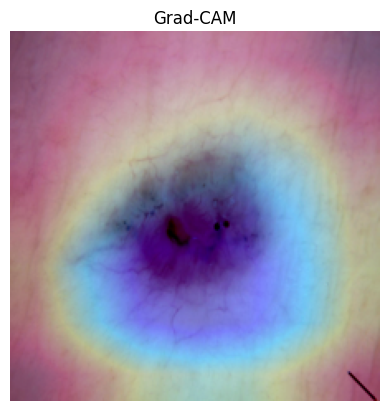

In [ ]:
# Load image from Google Drive
image_path = '/content/dataset/BCC/bcc_aug/ISIC_0024436.jpg'
image = Image.open(image_path).convert('RGB')

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image).unsqueeze(0).to(device)

# Display the original image
plt.imshow(image)
plt.title('BCC')
plt.axis('off')
plt.show()

# Generate Grad-CAM
target_layer = model.efficientnet_b4._blocks[-1]._project_conv  # Adjust target layer as needed
gradcam = generate_gradcam(model, input_tensor, target_layer)

# Plot Grad-CAM
plot_gradcam(input_tensor[0], gradcam)


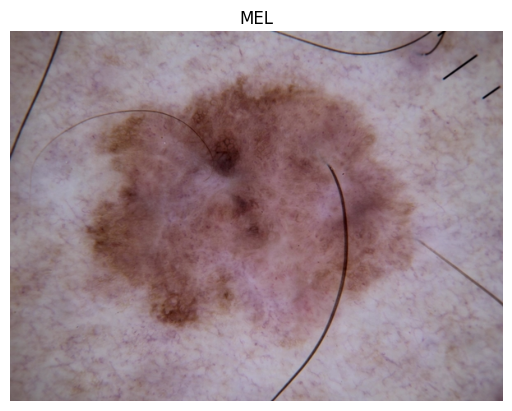

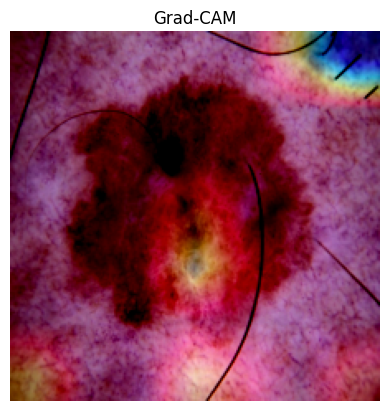

In [ ]:
# Load image from Google Drive
image_path = '/content/dataset/MEL/mel_aug/ISIC_0024333.jpg'
image = Image.open(image_path).convert('RGB')

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image).unsqueeze(0).to(device)

# Display the original image
plt.imshow(image)
plt.title('MEL')
plt.axis('off')
plt.show()

# Generate Grad-CAM
target_layer = model.efficientnet_b4._blocks[-1]._project_conv  # Adjust target layer as needed
gradcam = generate_gradcam(model, input_tensor, target_layer)

# Plot Grad-CAM
plot_gradcam(input_tensor[0], gradcam)


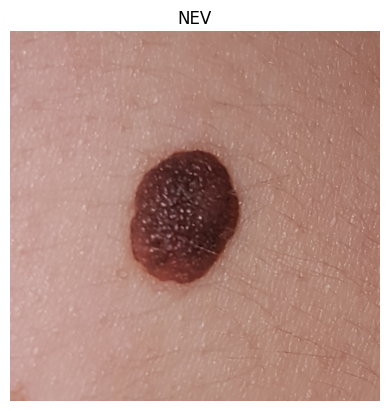

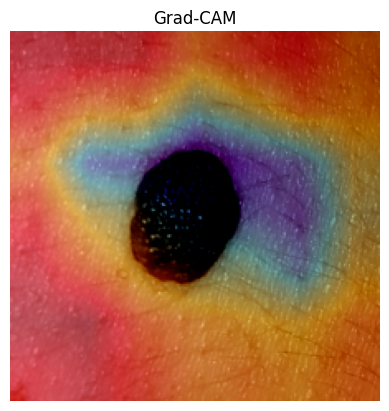

In [ ]:
# Load image from Google Drive
image_path = '/content/dataset/NEV/PAT_1109_436_141.png'
image = Image.open(image_path).convert('RGB')

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image).unsqueeze(0).to(device)

# Display the original image
plt.imshow(image)
plt.title('NEV')
plt.axis('off')
plt.show()

# Generate Grad-CAM
target_layer = model.efficientnet_b4._blocks[-1]._project_conv  # Adjust target layer as needed
gradcam = generate_gradcam(model, input_tensor, target_layer)

# Plot Grad-CAM
plot_gradcam(input_tensor[0], gradcam)
